#### Instructions:  
1. Libraries allowed: **Python basic libraries, numpy, and PIL.**
2. Show all outputs.
3. Submit jupyter notebook and a pdf export of the notebook.


## Task
Apply linear filters

Q1. a) Write a function to perform cross-correlation of an image with a filters. Note that the filter needs not to be flipped in x and y directions as in convolution.

In [77]:
import numpy as np
def cross_correlation(image, filter):
    M,N = image.shape
    m,n = filter.shape
    a=int((m-1)/2)
    b=int((n-1)/2)
    corr_output = np.zeros((M-(a*2),N-(b*2)))

    for i in range(a,M-a):
        for j in range(b,N-b):
            patch = image[i-a:i+a+1,j-b:j+b+1]
            cross_corr = np.sum(patch*filter)
            corr_output[i-a,j-b] = cross_corr

    return corr_output

Q2. Take an image of an object with your smartphone or own camera.
a)
1. normalize the image in the interval [0,1]
2. visualize the image with `matplotlib`.

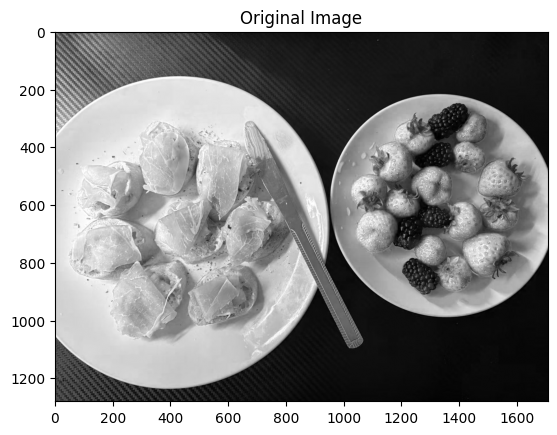

In [78]:
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt
    img = Image.open("Breakfast.jpg")
    # normalize the image in the interval [0,1]
    img = np.array(img)
    img = img/255.0
    img = img[:,:,0]
    # print(img)
    # visualize the image with matplotlib.
    plt.imshow(img,cmap="gray")
    plt.title("Original Image")
    plt.show()

b)
1. Add to the image random noises sampled from a normal distribution with a standard deviation of 0.1.
2. Visualize the noisy image.

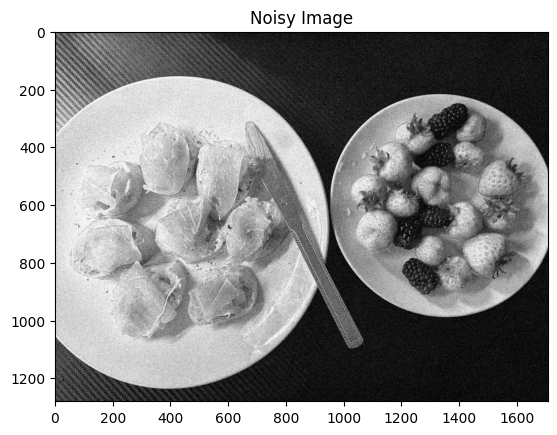

In [79]:
    # Add to the image random noises sampled from a normal distribution with a standard deviation of 0.1
    def add_noise(img, noise_std):
        noise = np.random.normal(0, noise_std, img.shape)
        noisy_img = img + noise
        noisy_img = np.clip(noisy_img, 0, 1)
        return noisy_img
    noisy_img = add_noise(img, 0.1)
    # Visualize the noisy image.
    plt.imshow(noisy_img,cmap="gray")
    plt.title("Noisy Image")
    plt.show()

c) Now, apply gaussian smoothing with three differnt standard deviations and compare the results. Select the kernel standard deviation such that size of the $3\sigma$ kernel sizes are different.

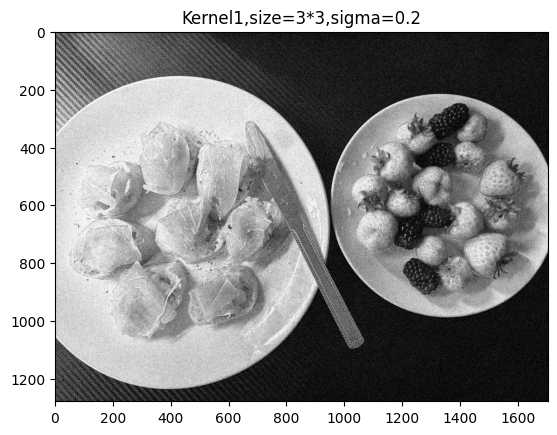

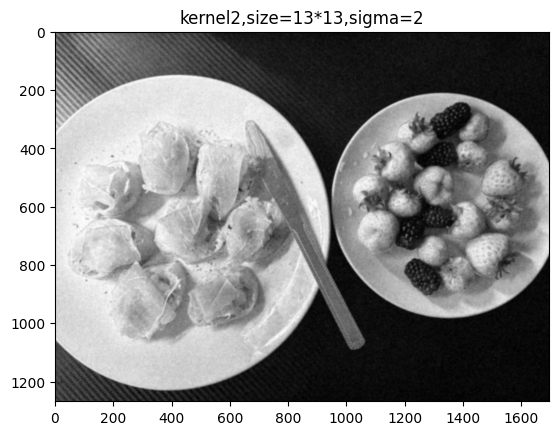

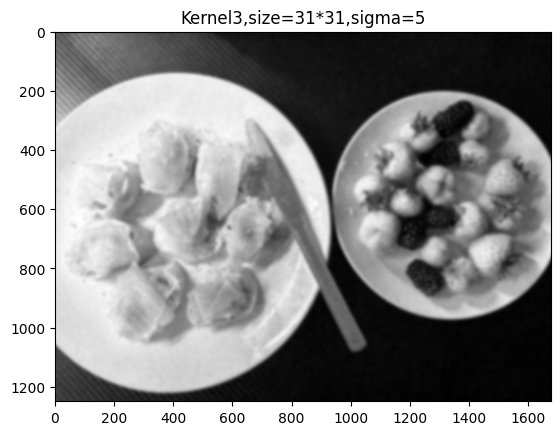

In [80]:
    def gaussian_kernel(size, sigma):
      ax = np.linspace(-(size // 2), size // 2, size)
      xx, yy = np.meshgrid(ax, ax)

      kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
      return kernel / np.sum(kernel)

    kernel1 = gaussian_kernel(3, 0.2)
    kernel2 = gaussian_kernel(13, 2)
    kernel3 = gaussian_kernel(31, 5)

    def gaussian_smoothing(img):
      plt.imshow(cross_correlation(img, kernel1),cmap="gray")
      plt.title("Kernel1,size=3*3,sigma=0.2")
      plt.show()

      plt.imshow(cross_correlation(img, kernel2),cmap="gray")
      plt.title("kernel2,size=13*13,sigma=2")
      plt.show()

      plt.imshow(cross_correlation(img, kernel3),cmap="gray")
      plt.title("Kernel3,size=31*31,sigma=5")
      plt.show()
      return

    gaussian_smoothing(noisy_img)


d) Repeat the steps (a), (b), and (c) for noise standard deviation = 0.2 and 0.4.

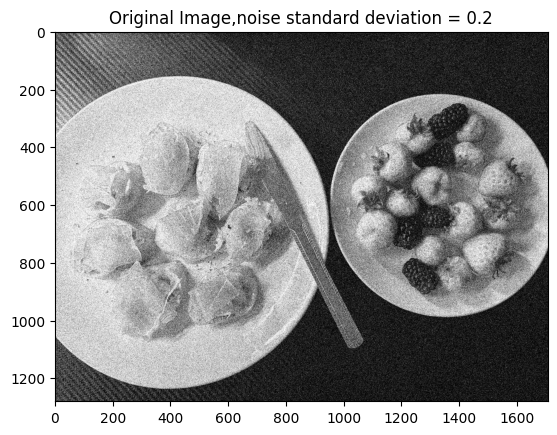

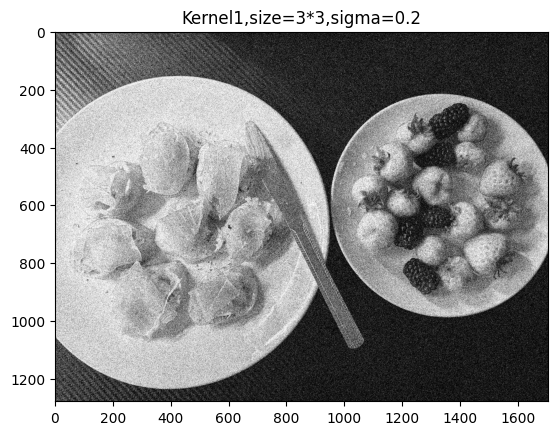

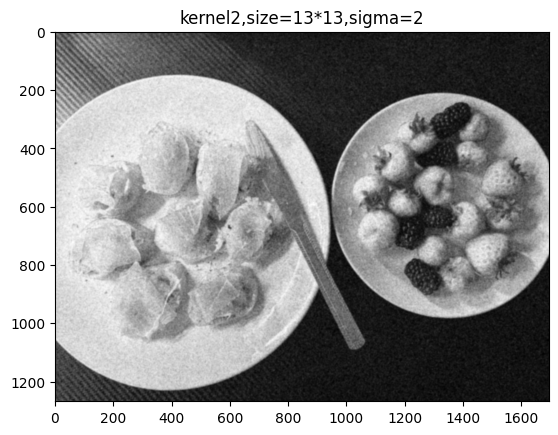

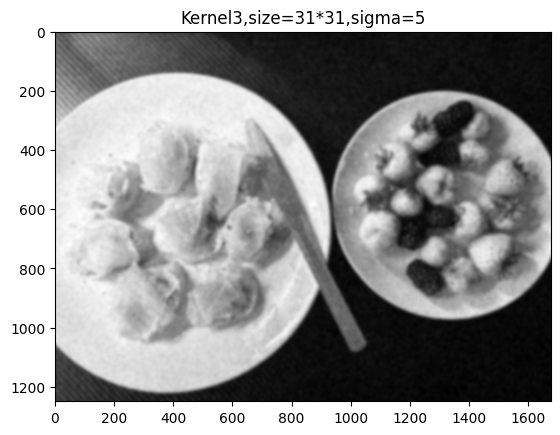

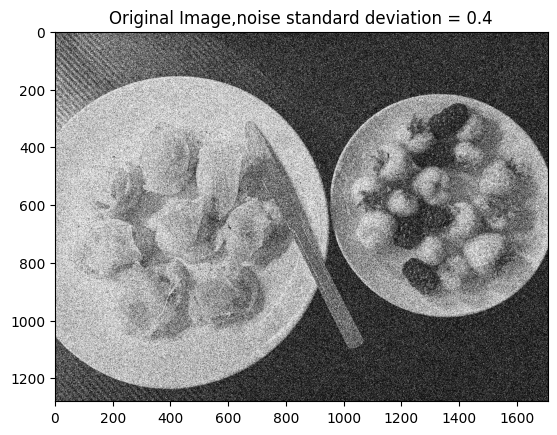

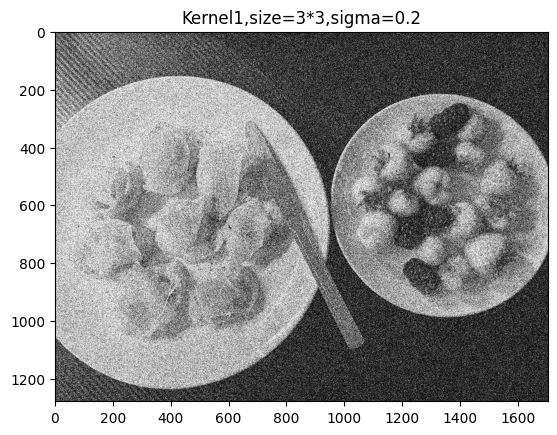

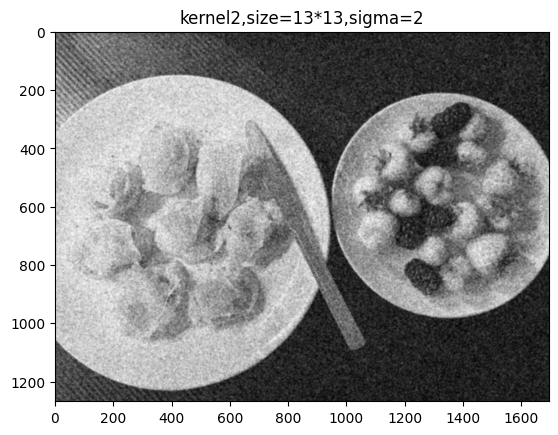

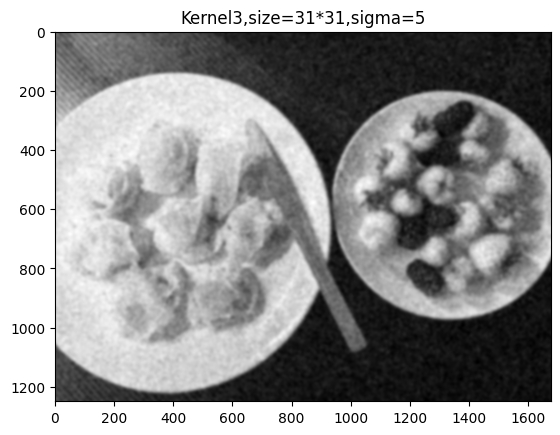

In [81]:
    # noise standard deviation = 0.2
    noisy_img1 = add_noise(img, 0.2)
    plt.imshow(noisy_img1,cmap="gray")
    plt.title("Original Image,noise standard deviation = 0.2")
    plt.show()
    gaussian_smoothing(noisy_img1)
    # noise standard deviation = 0.4
    noisy_img2 = add_noise(img, 0.4)
    plt.imshow(noisy_img2,cmap="gray")
    plt.title("Original Image,noise standard deviation = 0.4")
    plt.show()
    gaussian_smoothing(noisy_img2)

e) Compare the results, and discuss your findings.

In [82]:
    # bigger noise standard deviation creates more noise
    # bigger Gaussian Kernel sigma and size reduces noise but also turn to more blur pics

Q4. Template Matching:

a) Wtih cross-correlaton
1. Crop the left eye from the attached image and use that as a kernel/fiter. Visualize the kernel.
2. Compute cross-correlation of the image with the selected filter. Visualize the output
    

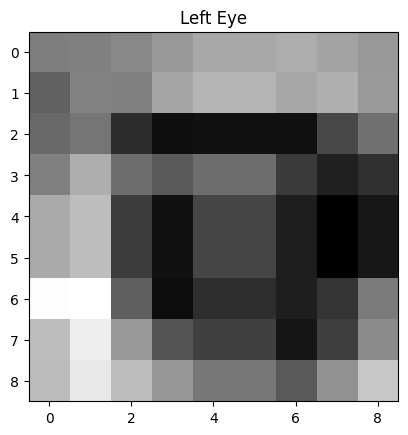

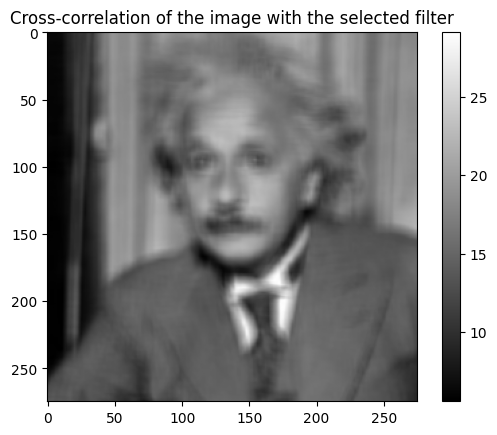

In [94]:
    # crop as my_kernel and visualize it
    Einstein=Image.open("Einstein-test-image-236-236-pixel.png")
    Einstein=np.array(Einstein)
    Einstein=Einstein[:,:,0]
    # Normalization, without this the result will overflow
    Einstein=Einstein/255.0

    my_kernel=np.zeros((9,9))
    my_kernel[:,:]=Einstein[95:104,154:163]
    plt.imshow(my_kernel,cmap="gray")
    plt.title("Left Eye")
    plt.show()

    # Compute cross-correlation of the image with the selected filter. Visualize the output
    plt.imshow(cross_correlation(Einstein,my_kernel),cmap="gray")
    plt.title("Cross-correlation of the image with the selected filter")
    plt.colorbar()
    plt.show()

a) using normalized cross-correlaton

$\rho(x,h) = \sum_i \frac{(x_i - \mu_x) (h_i-\mu_h)}{\sigma_x \sigma_h}$

1. Create a function for normalized for cross-correlation
    * inside the function, normalize the filter with its mean and standard deviation, $h = \frac{h-\mu_h}{\sigma_h}$
    * For each patch of the image, normalize it with its mean and standard deviation, $x = \frac{x-\mu_x}{\sigma_x}$
    * Then find cross-correlation between $x$ and $h$.
2. Compute normalized cross-correlation of the image with the filter used in (a). Visualize the output.
3. Compare the results in (a) and (b). Which method is better and why?

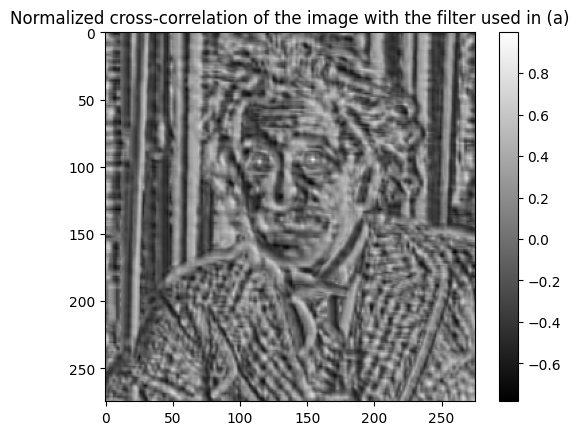

[[ 0.33464079  0.2522661   0.0270631  ... -0.46123059 -0.50773808
  -0.47215507]
 [ 0.31828327  0.3007215   0.05970587 ... -0.39581512 -0.4415766
  -0.4325135 ]
 [ 0.39867645  0.45034555  0.20296487 ... -0.18957562 -0.25711305
  -0.28771489]
 ...
 [-0.20797904 -0.11410304 -0.08676293 ...  0.37334345  0.41858217
   0.3742807 ]
 [-0.06912263  0.05739712  0.09909679 ...  0.41250646  0.50475597
   0.49322106]
 [ 0.09293425  0.23137573  0.24735324 ...  0.39393368  0.49846114
   0.511846  ]]


In [96]:
# Create a function for normalized for cross-correlation
def normalized_cross_correlation(image, filter):
    epsilon = 1e-5

    filter_mean = np.mean(filter)
    filter_std = np.std(filter) + epsilon
    filter_normalized = (filter - filter_mean) / filter_std

    M,N = image.shape
    m,n = filter.shape
    a=int((m-1)/2)
    b=int((n-1)/2)
    corr_output = np.zeros((M-(a*2),N-(b*2)))

    for i in range(a,M-a):
        for j in range(b,N-b):
            patch = image[i-a:i+a+1,j-b:j+b+1]
            patch_mean = np.mean(patch)
            patch_std = np.std(patch) + epsilon
            patch_normalized = (patch - patch_mean) / patch_std
            cross_corr = np.sum(patch_normalized*filter_normalized)/(m*n)
            corr_output[i-a,j-b] = cross_corr

    return corr_output

# Compute normalized cross-correlation of the image with the filter used in (a). Visualize the output.
output=normalized_cross_correlation(Einstein,my_kernel)
plt.imshow(output,cmap="gray")
plt.title("Normalized cross-correlation of the image with the filter used in (a)")
plt.colorbar()
plt.show()

print(np.array(output))